<a href="https://colab.research.google.com/github/Abhishek572002/Economic-Emission-of-Dispatch-Problem-Research-Project/blob/main/a_z_handwritten_alphabets_recognizer_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

# Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

# Data Exploring 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CI/A_Z Handwritten Data.csv')


In [ ]:
df.shape

(372450, 785)

In [ ]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

In [ ]:
# getting target variable
y = df['0']
del df['0']

**Dealing with imbalanced target**

In [ ]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

In [ ]:
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

**Encoding**

In [ ]:
#One-Hot-Encoding of the target.
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape , X_data.shape

((29120, 26), (29120, 784))

**Normalization**

In [ ]:
# preprocessing technique used in machine learning to scale the feature values 
# to a specific range, typically between 0 and 1. 

X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualization**

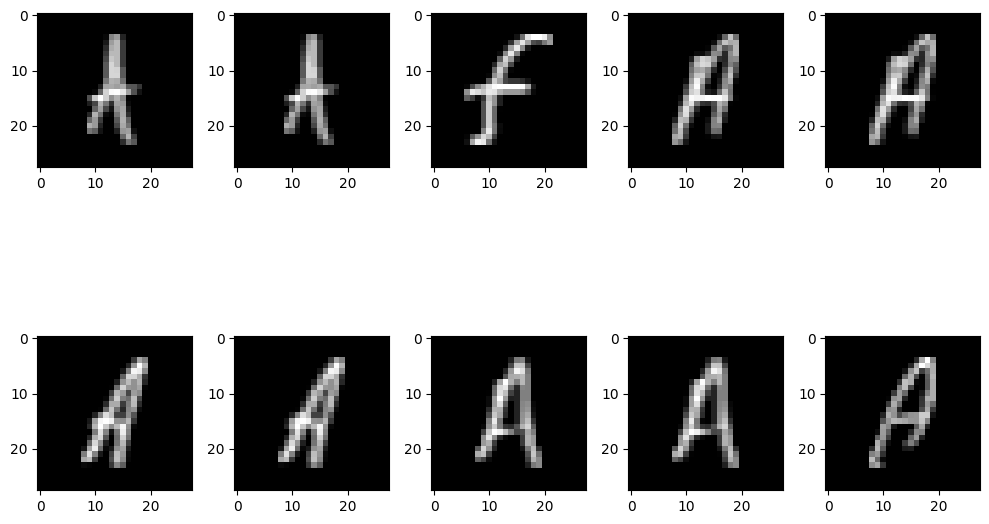

In [ ]:
X_data = np.array(X_data)
# The reshape() method returns a new reshaped numpy array, and does 
# not modify the original array X_data
X_data = X_data.reshape(-1,28,28,1) 
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
      #function call that displays a 2D grayscale image of a digit from the MNIST dataset.
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

**Train test split**

In [ ]:
#train_test_split( ) basically it splits the dataset into training and testing.
# 80 % to training and 20% to testing

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23296, 28, 28, 1), (5824, 28, 28, 1), (23296, 26), (5824, 26))

# Model 1

In [ ]:
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
182/182 [==============================] - 18s 89ms/step - loss: 0.4589 - accuracy: 0.8714 - val_loss: 0.1504 - val_accuracy: 0.9555
Epoch 2/15
182/182 [==============================] - 15s 81ms/step - loss: 0.1068 - accuracy: 0.9686 - val_loss: 0.1158 - val_accuracy: 0.9669
Epoch 3/15
182/182 [==============================] - 15s 80ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.1459 - val_accuracy: 0.9650
Epoch 4/15
182/182 [==============================] - 16s 87ms/step - loss: 0.0458 - accuracy: 0.9851 - val_loss: 0.1443 - val_accuracy: 0.9722
Epoch 5/15
182/182 [==============================] - 15s 84ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.1437 - val_accuracy: 0.9693
Epoch 6/15
182/182 [==============================] - 15s 83ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.1919 - val_accuracy: 0.9672
Epoch 7/15
182/182 [==============================] - 15s 82ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.1476 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/CI/model1.h5')

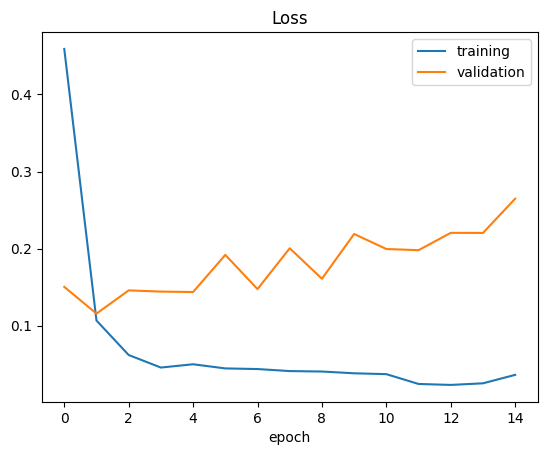

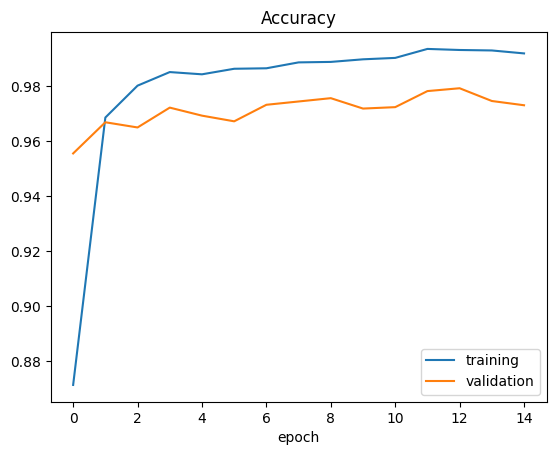

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

# Model 2 

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="same"))
model2.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=2)

Epoch 1/10
91/91 - 408s - loss: 0.0205 - accuracy: 0.5709 - val_loss: 0.0090 - val_accuracy: 0.8309 - 408s/epoch - 4s/step
Epoch 2/10


In [ ]:
model2.save('/content/drive/MyDrive/CI/model2.h5')

In [ ]:
# Final evaluation of the model
scores = model2.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2

# Load the Keras model
model = keras.models.load_model('/content/drive/MyDrive/CI/model1.h5')

# Load the image
image = cv2.imread('/content/drive/MyDrive/CI/A.jpeg', 0)
image = cv2.resize(image, (28, 28)) 

# Preprocess the image
image = np.expand_dims(image, axis=0)  
image = image / 255.0  

# Make predictions on the image
predictions = model.predict(image)

# Print the predicted class
predicted_class = np.argmax(predictions)
print('Predicted class:', predicted_class)


# Model 3

In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="same"))
model3.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu',padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model3.summary())

In [ ]:
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=2)

In [ ]:
model3.save('/content/drive/MyDrive/CI/model3.h5')

In [ ]:
# Final evaluation of the model
scores = model3.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

#Image Prediction


In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2

def predict_image(filename):
  # Load the Keras model
  model = keras.models.load_model('/content/drive/MyDrive/CI/model1.h5')

  # Load the image
  image = cv2.imread('/content/drive/MyDrive/CI/'+filename, 0)
  image = cv2.resize(image, (28, 28))  # Resize the image to the input shape of the model

  # Preprocess the image
  image = np.expand_dims(image, axis=0)  # Add batch dimension
  image = image / 255.0  # Normalize the pixel values to be between 0 and 1

  # Make predictions on the image
  predictions = model.predict(image)

  # Print the predicted class
  predicted_class = np.argmax(predictions)
  print('Predicted class:', predicted_class)
  print("The Alphabet Predicted is "+chr(ord('A')+predicted_class))

  img = plt.imread('/content/drive/MyDrive/CI/'+filename)
  plt.imshow(img)

predict_image('A.jpeg')
